# Linear Regression using Normal Equation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV Data file

In [2]:
insuranceData = pd.read_csv('insurance.csv')

### Visualizing Dataset Head

In [3]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Describing Dataset Information

#### About the Dataset

This dataset represents the attributes of inviduals and the charges the individual must pay for his/her insurance, based on his attributes.
1. Each Feature represents a particular attribute of individuals.
2. Each data-point represents a record of an individual.

In [4]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Describing Dataset Statistics

In [5]:
insuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

### Visualizing Pair-Plots for Features

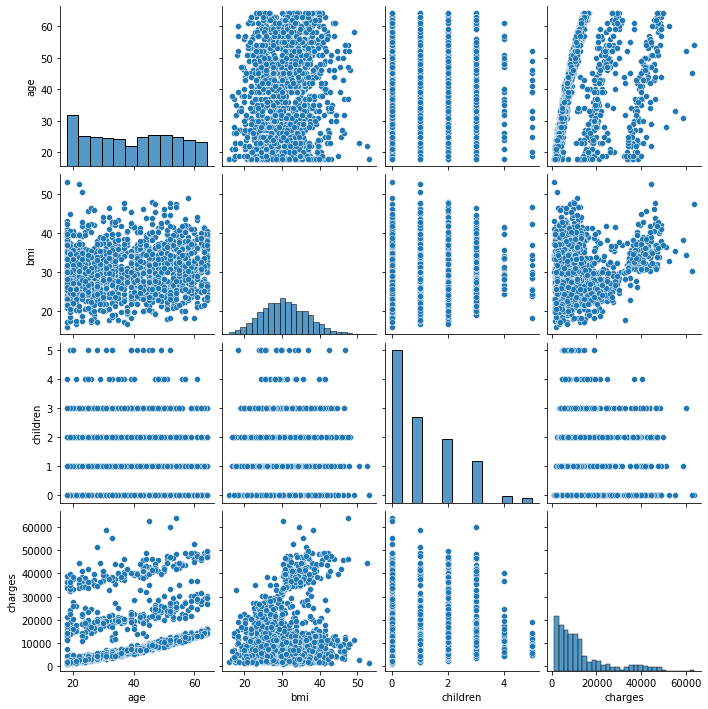

In [6]:
sns.pairplot(insuranceData)

### Visualizing Feature Correlation, using Heatmap

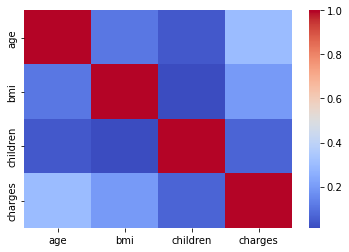

In [7]:
sns.heatmap(insuranceData.corr(),cmap='coolwarm')

## Feature Selection

### Eliminating Categorical Features in Dataset

In [8]:
selected_features = insuranceData.drop(['sex','smoker','region'],axis=1)
selected_features

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Spliting Feature set into Features and Predicted Value

### Selecting Features

In [9]:
#Define training features in X
X = selected_features[['age','bmi','children']]

### Adding Bias

In [10]:
#Adding bias term/extra feature as 1s to X
X['bias'] = np.ones(X.shape[0])

### Selecting Actual Values


In [11]:
#Define target ouput in y
Y = selected_features[['charges']]

## Linear Regression Implementation

This section implements Linear Regression using Normal Equation.

### Calculate Theta

This section defines a method to calculate the weights matrix using X and Y matrices, in normal equation.

In [12]:
# Function to calculate Theta
def calcTheta(x, y):
  return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

### Predict Values

This section defines a method to make predictions on the provided the set of data points, given **theta** (weights).

In [13]:
#Function to make predictions
def getPredictions(x, theta):
    return np.dot(x, theta)

### Calculate Mean Squared Error

This section calculates MSE for the given data points, on the predicted and actual values

In [14]:
#Function to calculate Mean Square Error
def getMSE(actual, predicted):
    return metrics.mean_squared_error(actual, predicted)

### Regression Line Plots

In [15]:
#Function to display plots
def display(x, y, predicted):
    y_label = y.columns[0]

    features_len = len(x.columns) // 3
    fig, ax = plt.subplots(features_len, 3, figsize = [15, 5 * features_len])
    
    for index, feature in enumerate(x.columns):
        ax[index].plot(x[feature], y,'o')
        ax[index].plot(x[feature], predicted, '-')
        ax[index].set_xlabel(feature.capitalize())
        ax[index].set_ylabel(y_label.capitalize())
        ax[index].set_title(f'{feature.capitalize()} vs {y_label.capitalize()}')
    
    plt.tight_layout()
    plt.show()

### Linear Regression Run

In [16]:
# Function to run linear regression
def runLinearRegression(t):
    """
    This function runs Linear Regression for the given percentage of training 
    size from the entire dataset. It first calculates "theta", using normal 
    equation. It then predicts values on the training and testing set using the 
    calculated theta. Finally, it calculates loss (MSE) on the training and 
    testing datasets
    """
    print(f'*** Start running linear regression with train size:{t*100} %'\
          f'and Test size:{(1-t)*100} %. ***')
    # Splitting the dataset into Training and Testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=t, random_state=101)
    # Get theta (weights) using Normal equation
    theta = calcTheta(X_train, y_train)
    print(f'Theta from training data:\n{theta}')
    # Predict Regression Values on the training and testing datasets, using the calculated theta
    predictTrainCharges = getPredictions(X_train, theta)
    predictTestCharges = getPredictions(X_test, theta)
    # Calculating Loss (MSE) on training and testing dataset
    trainMSE = getMSE(y_train, predictTrainCharges)
    testMSE = getMSE(y_test, predictTestCharges)
    print('Generalization Power - Test Set MSE: ',testMSE)
    print('Modeling Power - Train Set MSE: ',trainMSE)
    # Display plots of the Actual and Predicted Values, against the selected features
    display(X_test[['age', 'bmi', 'children']], y_test, predictTestCharges)
    print(f'*** End running linear regression with train size:{t*100} %'\
          f' and Test size:{(1-t)*100} %.***\n\n')
    return trainMSE, testMSE

### Simulation for Different Train Sizes

*** Start running linear regression with train size:20.0 %and Test size:80.0 %. ***
Theta from training data:
[[  212.22399422]
 [  246.7622926 ]
 [  467.97403003]
 [-2793.64258425]]
Generalization Power - Test Set MSE:  129771307.14894146
Modeling Power - Train Set MSE:  128587881.50255641


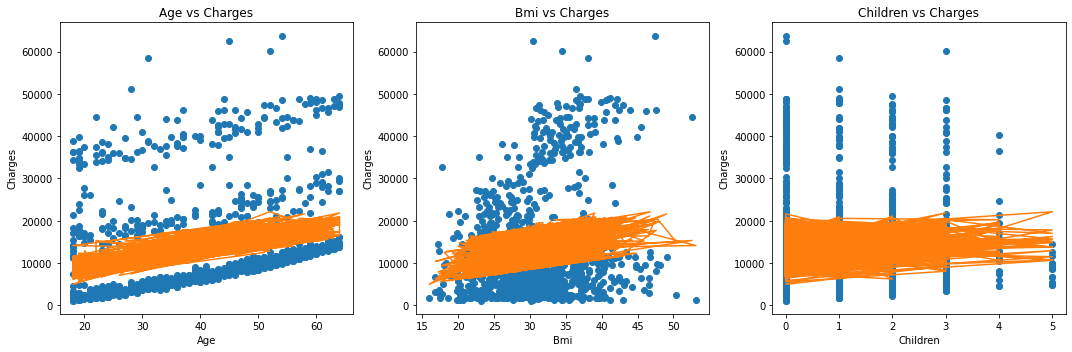

*** End running linear regression with train size:20.0 % and Test size:80.0 %.***


*** Start running linear regression with train size:30.0 %and Test size:70.0 %. ***
Theta from training data:
[[  223.13372151]
 [  393.50802787]
 [  732.38498326]
 [-7989.45509614]]
Generalization Power - Test Set MSE:  128469460.37767023
Modeling Power - Train Set MSE:  131231168.5235179


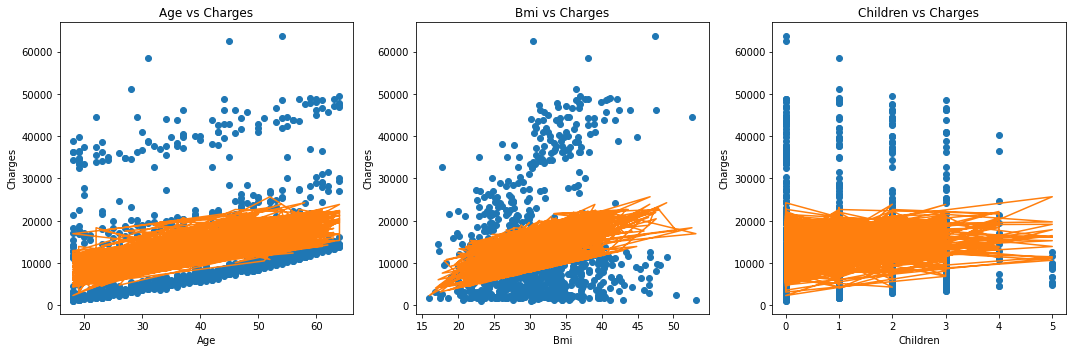

*** End running linear regression with train size:30.0 % and Test size:70.0 %.***


*** Start running linear regression with train size:40.0 %and Test size:60.0 %. ***
Theta from training data:
[[  197.06965117]
 [  365.51553355]
 [  603.53556138]
 [-5768.96354769]]
Generalization Power - Test Set MSE:  124535383.0012223
Modeling Power - Train Set MSE:  137282641.4286064


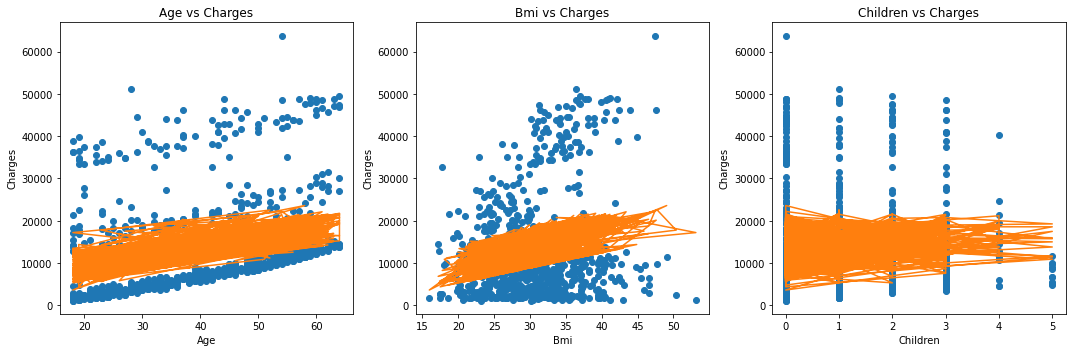

*** End running linear regression with train size:40.0 % and Test size:60.0 %.***


*** Start running linear regression with train size:50.0 %and Test size:50.0 %. ***
Theta from training data:
[[  207.89216801]
 [  372.16592856]
 [  534.78995225]
 [-6192.51725687]]
Generalization Power - Test Set MSE:  118402667.2748635
Modeling Power - Train Set MSE:  140901768.0613256


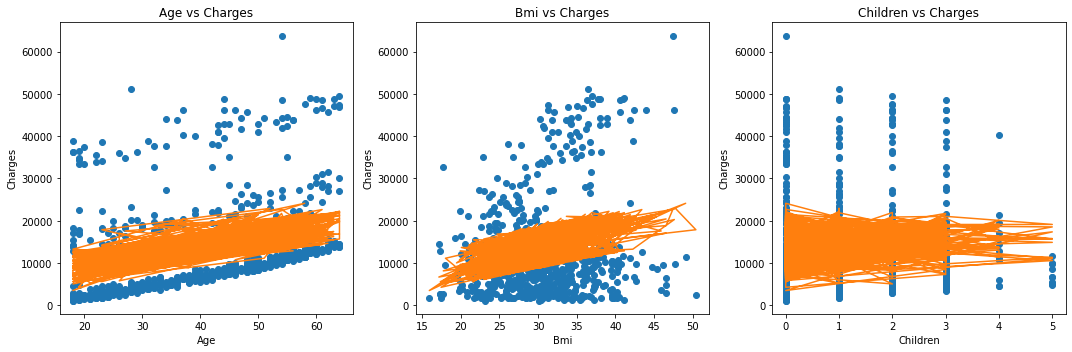

*** End running linear regression with train size:50.0 % and Test size:50.0 %.***


*** Start running linear regression with train size:60.0 %and Test size:40.0 %. ***
Theta from training data:
[[  206.10087148]
 [  364.39416115]
 [  614.7495574 ]
 [-6111.26565028]]
Generalization Power - Test Set MSE:  117478452.36075604
Modeling Power - Train Set MSE:  137518068.8559249


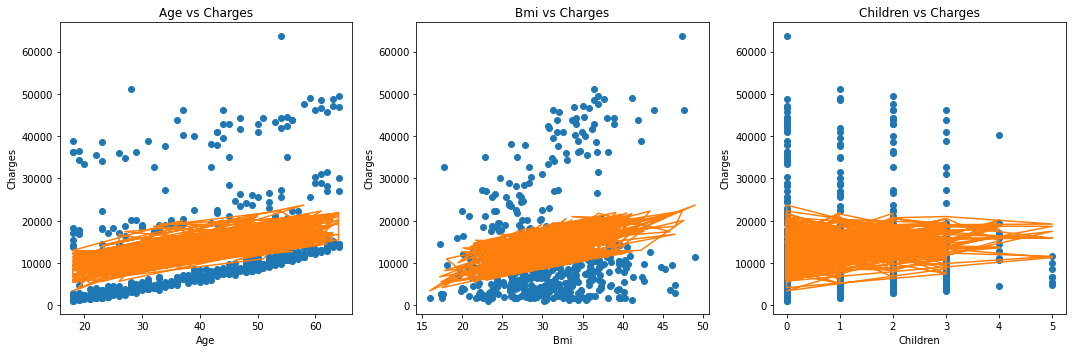

*** End running linear regression with train size:60.0 % and Test size:40.0 %.***


*** Start running linear regression with train size:70.0 %and Test size:30.000000000000004 %. ***
Theta from training data:
[[  236.48465729]
 [  345.44565905]
 [  586.50339609]
 [-7012.13591575]]
Generalization Power - Test Set MSE:  123136212.75357997
Modeling Power - Train Set MSE:  131524522.38658263


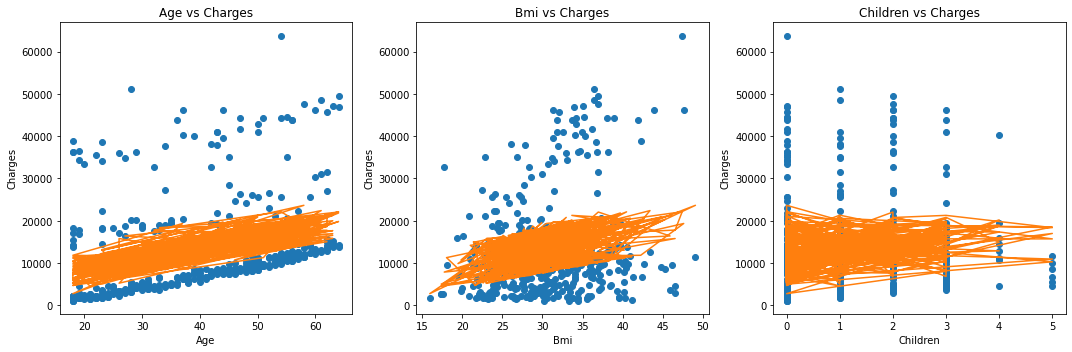

*** End running linear regression with train size:70.0 % and Test size:30.000000000000004 %.***


*** Start running linear regression with train size:80.0 %and Test size:19.999999999999996 %. ***
Theta from training data:
[[  232.25658224]
 [  350.27913876]
 [  656.22686115]
 [-7194.28370806]]
Generalization Power - Test Set MSE:  122818742.27213812
Modeling Power - Train Set MSE:  130539000.23235747


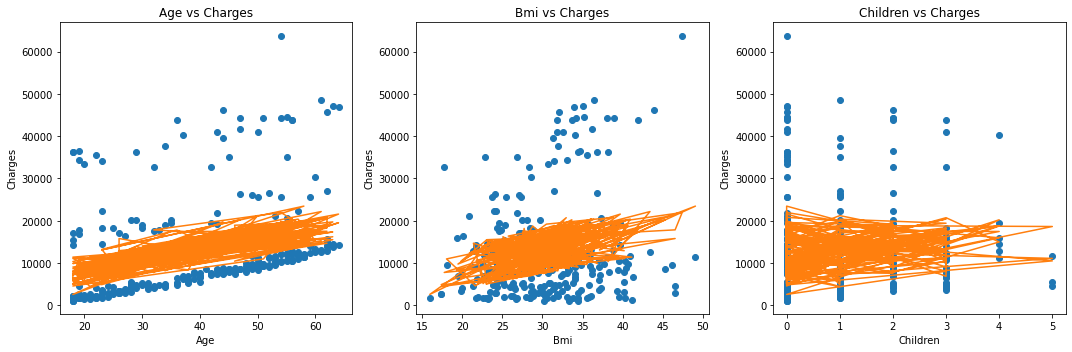

*** End running linear regression with train size:80.0 % and Test size:19.999999999999996 %.***




In [17]:
#Run regression with test set size as 20%,30%,40%,50%,60%,70% and 80% respectively.
data = { 'Train Set Size': [], 'Train MSE': [], 'Test MSE': []}
for t in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    trainMSE, testMSE = runLinearRegression(t)
    data['Train Set Size'].append(t)
    data['Train MSE'].append(trainMSE)
    data['Test MSE'].append(testMSE)

### Performance Comparison

In [18]:
data_df = pd.DataFrame(data)
data_df.sort_values('Test MSE',ascending=True)

,Train Set Size,Train MSE,Test MSE
4,0.6,1.375181e+08,1.174785e+08
3,0.5,1.409018e+08,1.184027e+08
6,0.8,1.305390e+08,1.228187e+08
5,0.7,1.315245e+08,1.231362e+08
2,0.4,1.372826e+08,1.245354e+08
1,0.3,1.312312e+08,1.284695e+08
0,0.2,1.285879e+08,1.297713e+08


#### Visualizing MSE Trend

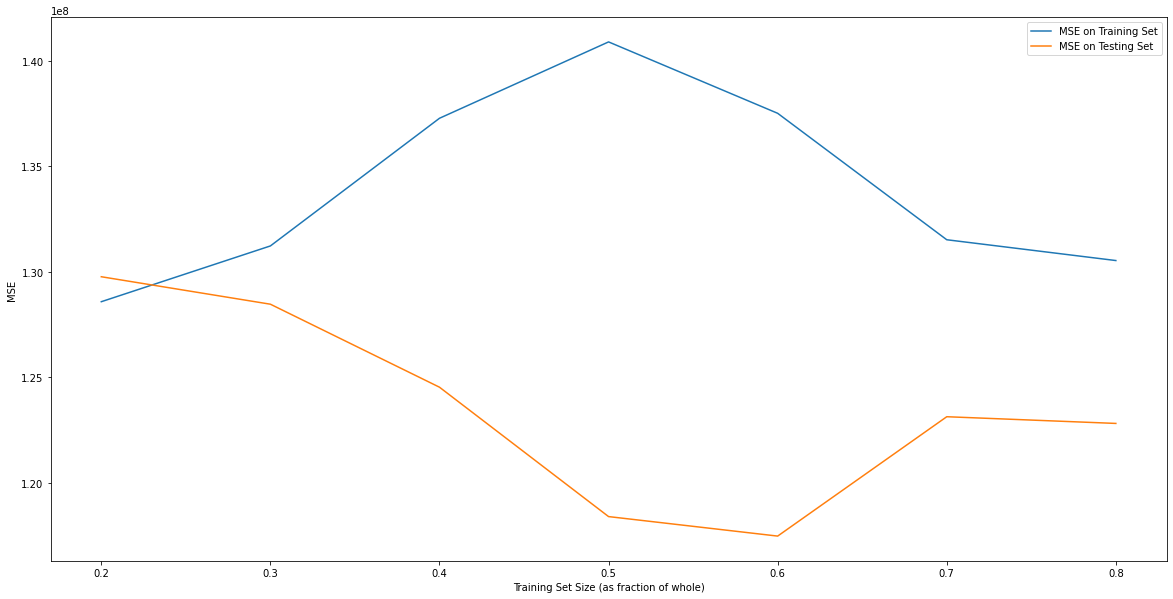

In [19]:
plt.figure(figsize = [20,10])
plt.plot(data_df['Train Set Size'], data_df['Train MSE'], label='MSE on Training Set')
plt.plot(data_df['Train Set Size'], data_df['Test MSE'], label='MSE on Testing Set')
plt.xlabel('Training Set Size (as fraction of whole)')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

#### Picking the Regressor with the best performance

This section will pick the Linear Regressor implementation which has the minimum loss.

In [20]:
min_loss_df = data_df[data_df['Test MSE'] == data_df['Test MSE'].min()]
print(f"The Linear Regression implementation with the least loss is:")
min_loss_df

The Linear Regression implementation with the least loss is:


,Train Set Size,Train MSE,Test MSE
4,0.6,1.375181e+08,1.174785e+08


## Conclusion

Initially, as we go on increasing the ratio of training dataset, the loss on testing dataset of the model decreases. But, after a certain point the loss starts increasing, indicating overfitting of data points.